In [90]:
from impedance.models.circuits.elements import element
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mpmath import *
from models import *

In [99]:
R1=1000
R2=2000
Q=6e-4
delta1=0.95
alpha=1

# R1, R1Q, R2Q, delta1, alpha = 1000, 1000*1e-4, 2000*1e-4, 0.4, 1

param_to_sim=[R1, R1*Q, R2*Q, delta1, alpha]
c_sim_two=CustomCircuit(initial_guess=param_to_sim,circuit="TLMtwo")

freq=np.logspace(0,3,100)

z_sim_two=c_sim_two.predict(frequencies=freq)
# plt.plot(np.real(z_sim_two),-np.imag(z_sim_two))
# plt.gca().set_aspect("equal")

In [100]:
param_to_fit=[R1*1.2, R1*Q*1.5, R2*Q*1.7, 0.2, alpha]
c_fit_two=CustomCircuit(initial_guess=param_to_fit,circuit="TLMtwo")
c_fit_two.fit(impedance=z_sim_two,frequencies=freq,bounds=((0,0,0,0,0.5),(np.inf,np.inf,np.inf,1,1)))

R1_fit=c_fit_two.parameters_[0]
Q_fit=c_fit_two.parameters_[1]/c_fit_two.parameters_[0]
R2_fit=c_fit_two.parameters_[2]/Q_fit
delta1_fit=c_fit_two.parameters_[3]
alpha_fit=c_fit_two.parameters_[4]

c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_lsq\trf.py:234: RuntimeWarning: divide by zero encountered in divide
  Delta = norm(x0 * scale_inv / v**0.5)
c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_lsq\trf.py:363: RuntimeWarning: invalid value encountered in scalar divide
  alpha *= Delta / Delta_new
c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_lsq\common.py:49: RuntimeWarning: invalid value encountered in scalar divide
  t2 = c / q
c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_lsq\trf.py:363: RuntimeWarning: invalid value encountered in scalar multiply
  alpha *= Delta / Delta_new
c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_lsq\common.py:398: RuntimeWarning: invalid value encountered in cast
  return min_step, np.equal(steps, min_step) * np.sign(s).astype(int)


In [101]:
print(c_fit_two)


Circuit string: TLMtwo
Fit: True

Initial guesses:
  TLMtwo_0 = 1.20e+03 [Ohm]
  TLMtwo_1 = 9.00e-01 [Ohm F]
  TLMtwo_2 = 2.04e+00 [Ohm F]
  TLMtwo_3 = 2.00e-01 []
  TLMtwo_4 = 1.00e+00 []

Fit parameters:
  TLMtwo_0 = 1.00e+03  (+/- 3.05e-03) [Ohm]
  TLMtwo_1 = 6.00e-01  (+/- 3.15e-06) [Ohm F]
  TLMtwo_2 = 9.51e-01  (+/- 7.63e-01) [Ohm F]
  TLMtwo_3 = 9.39e-01  (+/- 4.44e-02) []
  TLMtwo_4 = 1.00e+00  (+/- 8.17e-07) []



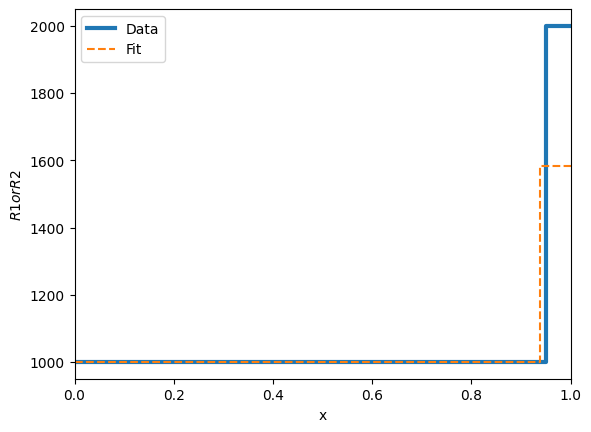

In [102]:
fig, ax=plt.subplots()
x=np.linspace(0,1)
#plot the original data R1 and R2 values
ax.plot([0,delta1,delta1,1],[R1,R1,R2,R2],linewidth=3)

#plot the fitted R1 and R2 values
ax.plot([0,delta1_fit,delta1_fit,1],[R1_fit,R1_fit,R2_fit,R2_fit],linestyle="--")

ax.set_xlabel("x")
ax.set_ylabel("$R1 or R2$")
ax.set_xmargin(0)
ax.legend(["Data","Fit"])